### Image Process

### How does it work? SVD Martices


If to denote the column vector $v_{\alpha}$ in matrix **V**, then it will be the row vectors in **$V_{T}$** space. 

Column of matrix **U**, diagonals **$\Sigma$** and row of matrix **$V_{T}$**, they all have dimension of $\alpha$, thus to index all of them with same $\alpha$:
$$
A = U \Sigma V_{T}   \\
  = \begin{bmatrix} |&&| \\ u_{1} &\cdots& u_{\alpha} \\ |&&| \end{bmatrix}
    \begin{bmatrix} \sigma_{1}& & \\  &\ddots& \\ &&\sigma_{\alpha} \end{bmatrix}
    \begin{bmatrix} -&v_{1}&- \\ &\vdots& \\ -&v_{\alpha}&- \end{bmatrix}
$$ 
The operation of multiplying a diagonal matrix to another matrix is that: if from behind, applying a factor of $\sigma_{\alpha}$ to each column; if from the front, applying a factor of $\sigma_{\alpha}$ to each row. Here is from the front, thus **rows**:
$$
  = \begin{bmatrix} |&&| \\ u_{1} &\cdots& u_{\alpha} \\ |&&| \end{bmatrix}
    \begin{bmatrix} -&\sigma_{1}v_{1}&- \\ &\vdots& \\ -&\sigma_{i}v_{\alpha}&- \end{bmatrix} 
$$
K is the dimension of column vectors of matrix **U**, in other word, number of rows, in other word, **U** is a $K\times \alpha$ matrix. But that won't matter much because we want to put it in column vector view.
$$
  = \begin{bmatrix} 
    \sum_{i = 1}^{\alpha} u_{1i}\sigma{i}v_{1i} &\cdots& \sum_{i = 1}^{\alpha} u_{1i}\sigma{i}v_{\alpha i} \\
    \vdots & \ddots & \vdots \\
    \sum_{i = 1}^{\alpha} u_{Ki}\sigma{i}v_{1i} &\cdots& \sum_{i = 1}^{\alpha} u_{Ki}\sigma{i}v_{\alpha i}
    \end{bmatrix}
$$ 

$$
  = \begin{bmatrix}
    |&&| \\
    \sum_{i = 1}^{\alpha} u_{i}\sigma{i}v_{1i} &\cdots& \sum_{i = 1}^{\alpha} u_{i}\sigma{i}v_{\alpha i} \\
    |&&| \\
    \end{bmatrix}
$$

$$
  = \sum_{i = 1}^{\alpha} \begin{bmatrix}
    |&&| \\
    \sigma_{i} v_{1 i} u_{i} &\cdots& \sigma_{i} v_{\alpha i} u_{i} \\
    |&&| \end{bmatrix}
$$

$$
  = \sum_{i = 1}^{\alpha} \begin{bmatrix}
    \sigma_{i} v_{1 i} u_{1i} &\cdots& \sigma_{i} v_{\alpha i} u_{1i}\\
    \vdots & \ddots & \vdots \\
    \sigma_{i} v_{1 i} u_{Ki} &\cdots& \sigma_{i} v_{\alpha i} u_{Ki} \\
    \end{bmatrix}
$$

$$
  = \sum_{i = 1}^{\alpha} \sigma_{i}
    \begin{bmatrix}
    u_{1i} \\ \vdots \\ u_{Ki}
    \end{bmatrix}
    \begin{bmatrix}
    v_{1i} & \vdots & v_{\alpha i}
    \end{bmatrix}
$$
Then, in the form of the outer product $\otimes$, just to take the last element transpose, then it will be in column vector:
$$
A = \sum_{i = 1}^{\alpha} \sigma_{i} u_{i} \otimes v_{i}^{T}
$$
Which in a cleaner form:
$$
A = \sum_{\alpha} \sigma_{\alpha} u_{\alpha} v_{\alpha}^{T}
$$
Q.E.D.

<Figure size 640x480 with 0 Axes>

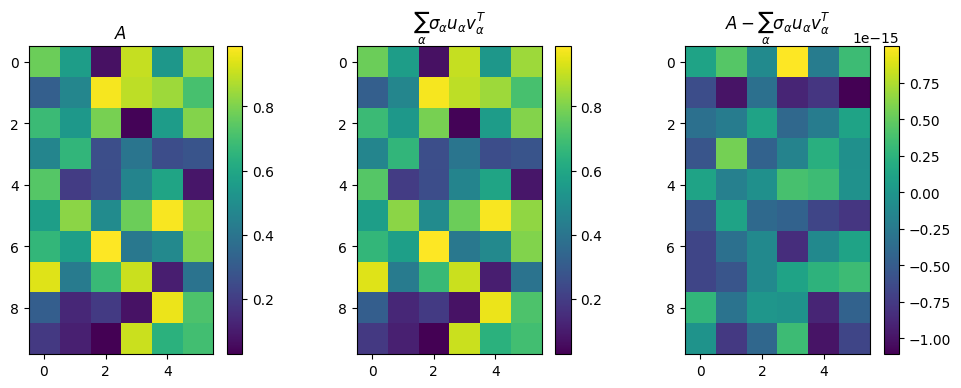

In [ ]:
import numpy as np
import scipy.linalg as sllg 
import matplotlib.pyplot as plt


rng = np.random.default_rng()

# summation of column vector outer product
# for convenience, I code part (c) together here:
def sum_comp(u, sigma, vt, truncate = False, stop = 0):
    sum_matrix = np.zeros(shape= np.shape(u))

    if truncate ==False:
        for i in range(len(sigma)):
            sum_matrix += sigma[i] * np.outer(u[:, i], vt.transpose()[:, i])
        return sum_matrix
    
    if truncate ==True:
        for i in range(stop):
            sum_matrix += sigma[i] * np.outer(u[:, i], vt.transpose()[:, i])
        return sum_matrix


# This functioin is imported from the examples in class notes
def plot_matrices(A,titles=[]):
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA)
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()

matrixA = rng.uniform(size=(10, 6))
U, Sdiag, VT = np.linalg.svd(matrixA, full_matrices=False)

plot_matrices( [matrixA, sum_comp(U, Sdiag, VT), matrixA - sum_comp(U, Sdiag, VT)],
              titles= [r"$A$", r"$\sum_{\alpha} \sigma_{\alpha}u_{\alpha} v_{\alpha}^{T}$"
                       , r"$A - \sum_{\alpha} \sigma_{\alpha}u_{\alpha} v_{\alpha}^{T}$"])


### Application applied to an image of Crab Nebula


By looking at the result images, I will say the in order to keep the most of the information contained, visually, is to have **more than** $15\% N$. Below this number, the image will be heavily blured, especially for any text in embedded in the images.

The compressing ratio at $10\% N$ calculated in the following manner. If to say that every pixel contains 1 number. Then its equivalent matrix contains $$ n \times m$$ pieces of information. In the SVD decoposition, matrix U has the same size of matrix A, but we are aiming for only the first few columns of that matrix U. And same idea also applies to matrix $V_{T}$ and diagonal $\sigma$:
$$
factor = \frac{ratio * nm + ratio * m + ratio * m^2}{nm}
$$ 
$$
= ratio \frac{n + m + 1}{n}
$$
Here I define ratio to be $15\%$, and I demand that $n > m$. More boardly, I can replace it with length and width (in pixel) of the image. Thus a good conpression that is both small in space, and readable is roughly:
$$
factor = 0.15\frac{length + width +1}{length}
$$
Furthermore, if for **higher resolution** picture width + length is much greater than 1, the approximation could be taken:
$$
f \approx 0.15 \frac{length + width}{length}
$$
For example for a square picture where width = length:
$$
f \approx 0.3
$$
How amazing, for only $30\%$ of the space, the image is pretty much the original!

**NOTE**
The chosen picture is real-life, unflitered image, lit in daylight, which means it is almost equal in every RGB channel.

(500, 500)


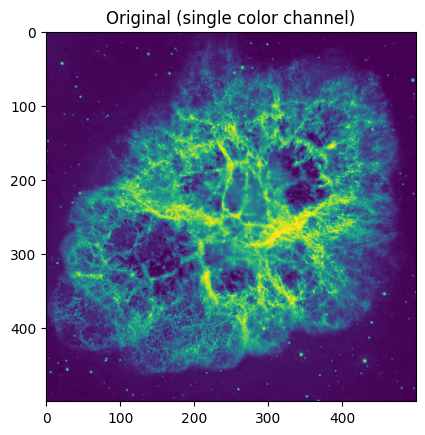

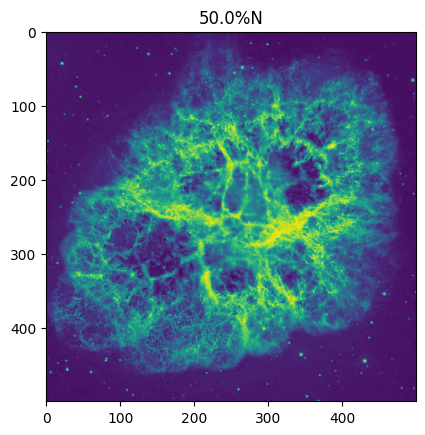

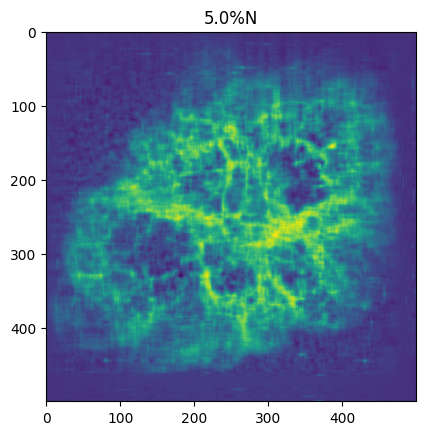

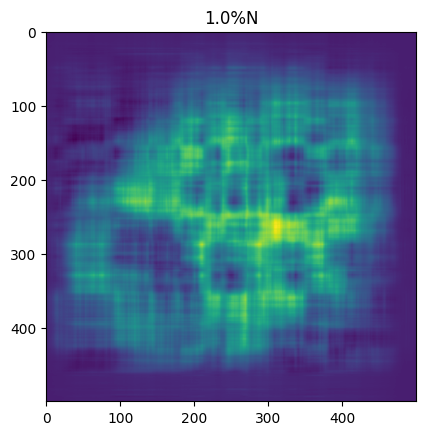

In [ ]:
from PIL import Image
img = Image.open('Crab_Nebula.jpg')
red = np.asarray(img)[:,:,0]   # the last index selects the RG or B component
green = np.asarray(img)[:,:,1]
blue = np.asarray(img)[:,:,2]

def matrix_compress(matrix, ratio = 0.5):   # high ratio -> high image quality
    
    # like discribed earlier, if the image is longer vertically, rotate it 90 degress
    # so that my function can operate it
    if np.shape(matrix)[0] < np.shape(matrix)[1]:
        matrix = matrix.transpose()
        uu, ssdiag, vtt = np.linalg.svd(matrix, full_matrices=False)
        stop = int(ratio * np.shape(uu)[1])
        
        # rotate it back to output
        return sum_comp(uu, ssdiag, vtt, truncate=True, stop= stop).transpose()
    else:
        uu, ssdiag, vtt = np.linalg.svd(matrix, full_matrices=False)
        stop = int(ratio * np.shape(uu)[1])
        return sum_comp(uu, ssdiag, vtt, truncate=True, stop= stop)


# plot the original picture for comparison
print(np.shape(red))
plt.imshow(red)
plt.title("Original (single color channel)")
plt.show()

# plot for different compressing ratio
ratio = [0.5, 0.05, 0.01]
for r in ratio:
    plt.imshow(matrix_compress(red, ratio = r))
    plt.title(str(100*r) + "%N")
    plt.show()
